# Iris Visualization

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

sys.path.append("..")

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Spark libs
from pyspark.sql.session import SparkSession
from helpers.path_translation import translate_to_file_string

Select the Imput File

In [2]:
inputFile = translate_to_file_string("../data/iris.data")

SparkSession creation

In [3]:
spark = (SparkSession
       .builder
       .appName("IrisVisualization")
       .getOrCreate())

Create a DataFrame using an ifered schema 

In [4]:
# load data file.
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "false") \
       .option("inferSchema", "true") \
       .option("delimiter", ",") \
       .csv(inputFile) \
       .withColumnRenamed("_c0","sepal length")\
       .withColumnRenamed("_c1","sepal width") \
       .withColumnRenamed("_c2","petal length")\
       .withColumnRenamed("_c3","petal width") \
       .withColumnRenamed("_c4","label")
print(df.printSchema())

root
 |-- sepal length: double (nullable = true)
 |-- sepal width: double (nullable = true)
 |-- petal length: double (nullable = true)
 |-- petal width: double (nullable = true)
 |-- label: string (nullable = true)

None


## Plot the data

In [5]:
printDf(df.summary())

,summary,sepal length,sepal width,petal length,petal width,label
0,count,150,150,150,150,150
1,mean,5.843333333333335,3.0540000000000007,3.7586666666666693,1.1986666666666672,None
2,stddev,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,None
3,min,4.3,2.0,1.0,0.1,Iris-setosa
4,25%,5.1,2.8,1.6,0.3,None
5,50%,5.8,3.0,4.3,1.3,None
6,75%,6.4,3.3,5.1,1.8,None
7,max,7.9,4.4,6.9,2.5,Iris-virginica


In [6]:
### Box Plots

Saving figure attribute_box_plots


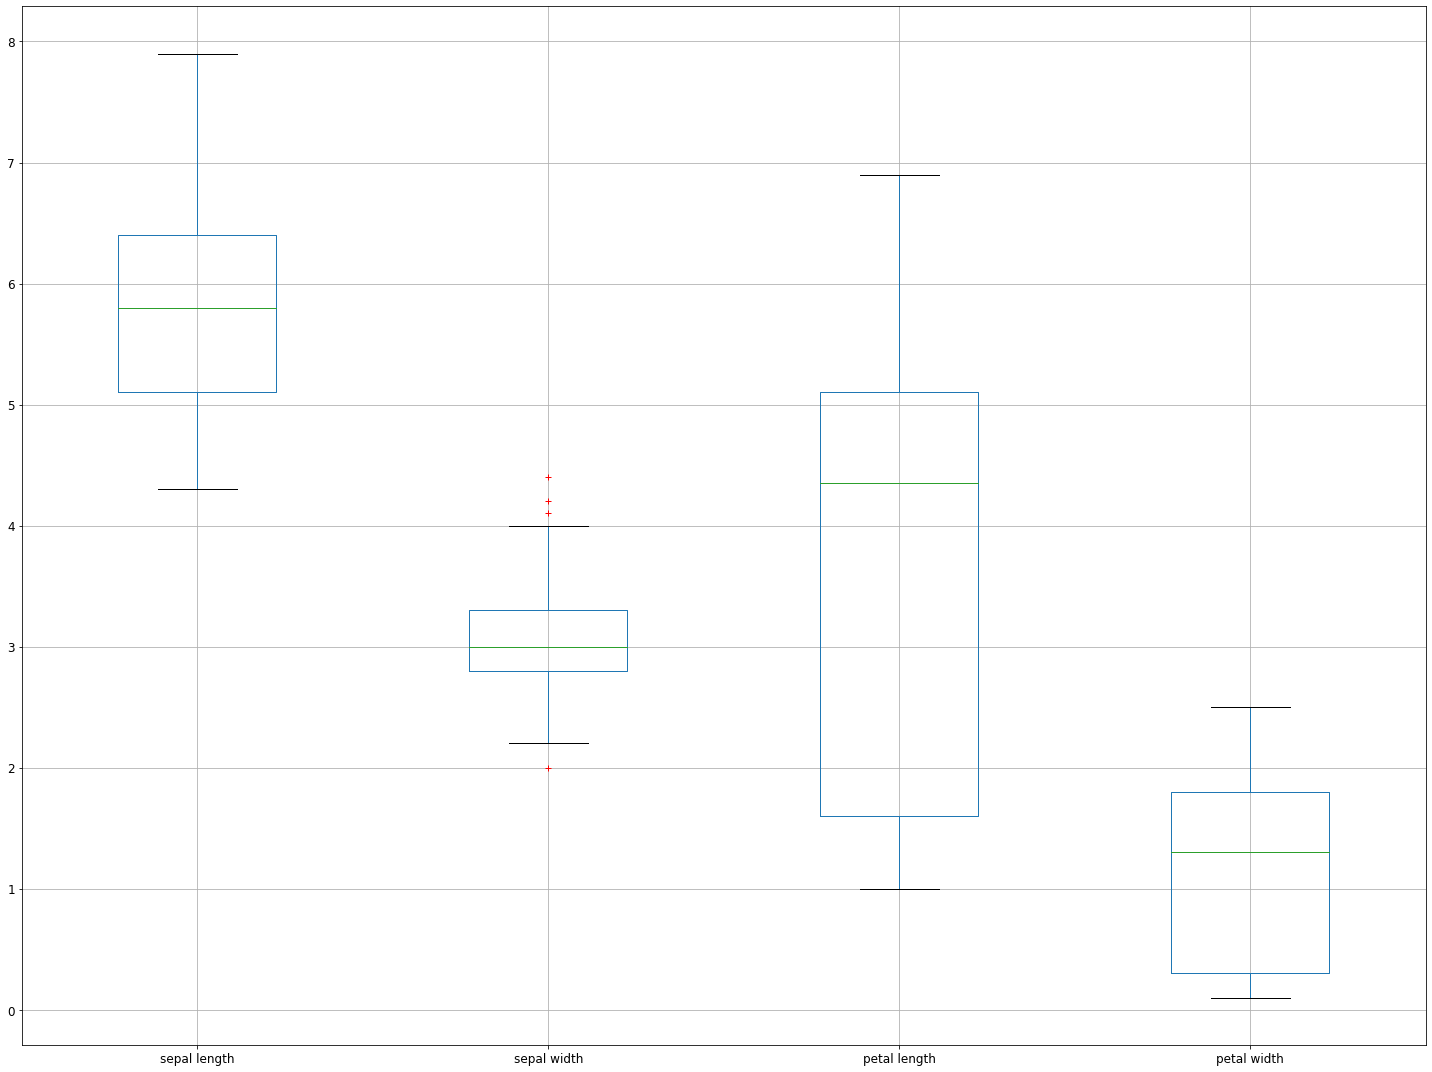

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().boxplot(sym='r+', figsize=(20,15))
save_fig("attribute_box_plots")
plt.show()

### Histograms

Saving figure attribute_histogram_plots


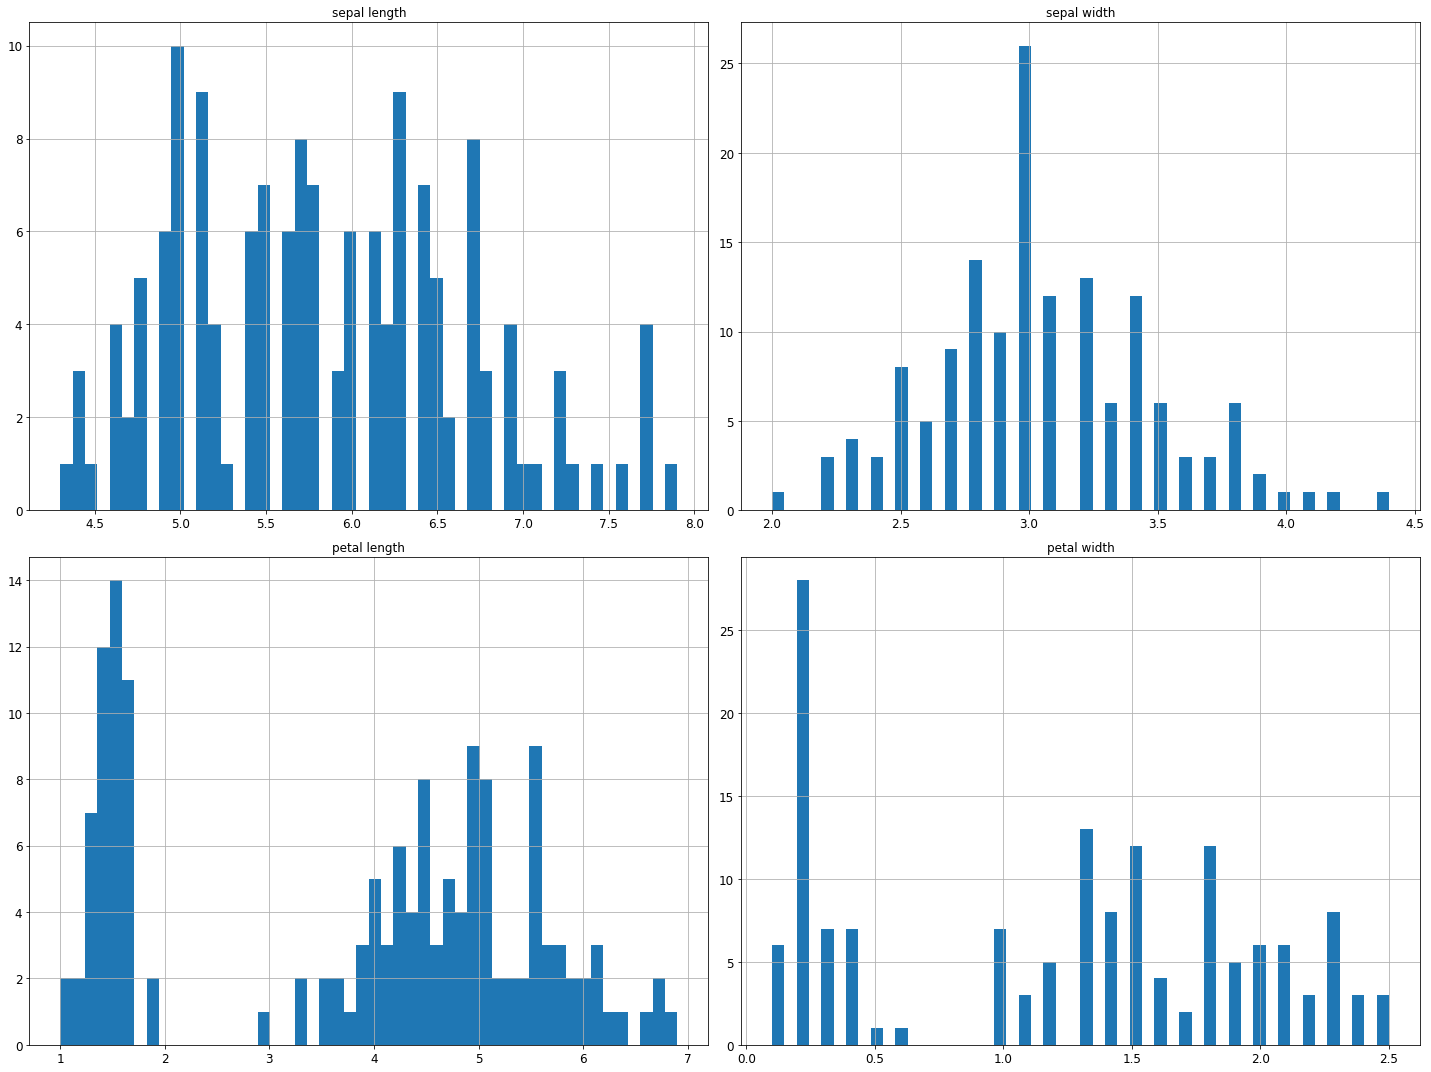

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Density Plot

Saving figure attribute_density_plots


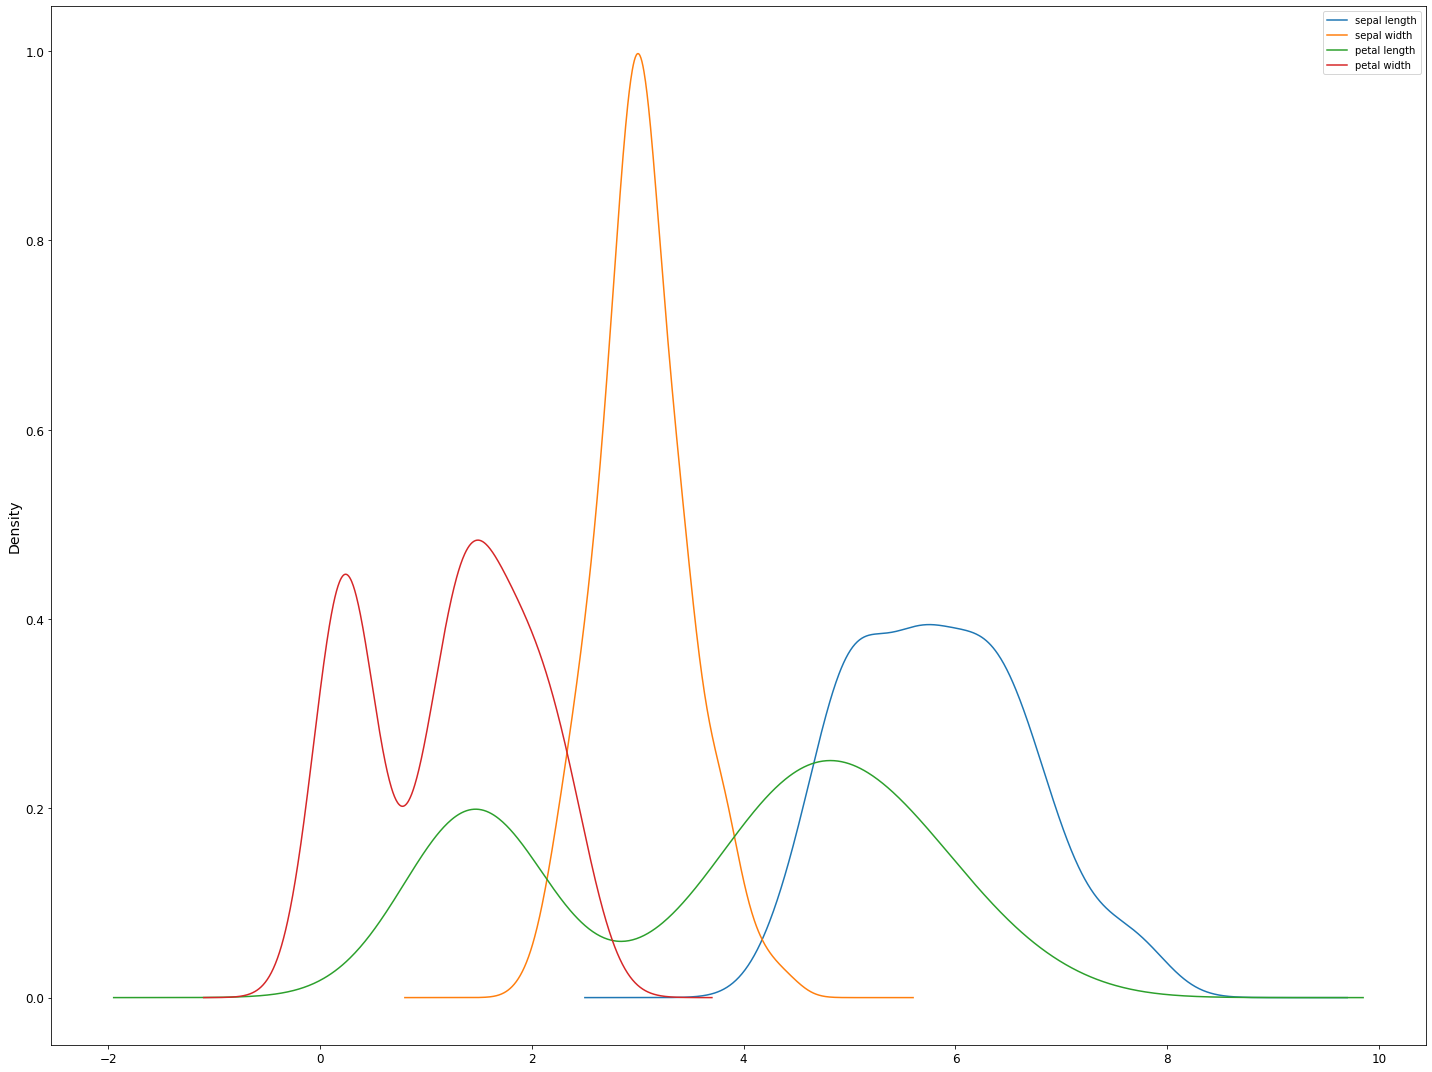

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().plot.kde(figsize=(20,15))
save_fig("attribute_density_plots")
plt.show()

### Scatter Plot

Saving figure scatter_plots


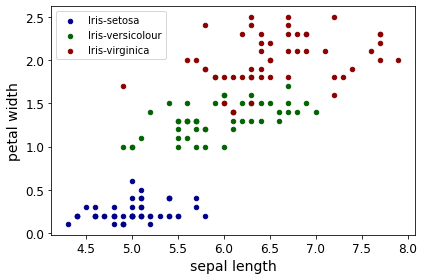

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = df.filter(df.label == "Iris-setosa" ).toPandas().plot.scatter(x='sepal length', y='petal width', color='DarkBlue', label='Iris-setosa')
df.filter(df.label == "Iris-versicolor").toPandas().plot.scatter(x='sepal length', y='petal width', color='DarkGreen', label='Iris-versicolour', ax=ax)
df.filter(df.label == "Iris-virginica").toPandas().plot.scatter(x='sepal length', y='petal width', color='DarkRed', label='Iris-virginica', ax=ax)
save_fig("scatter_plots")
plt.show()

### Scatter matrix

Saving figure scatter_matrix


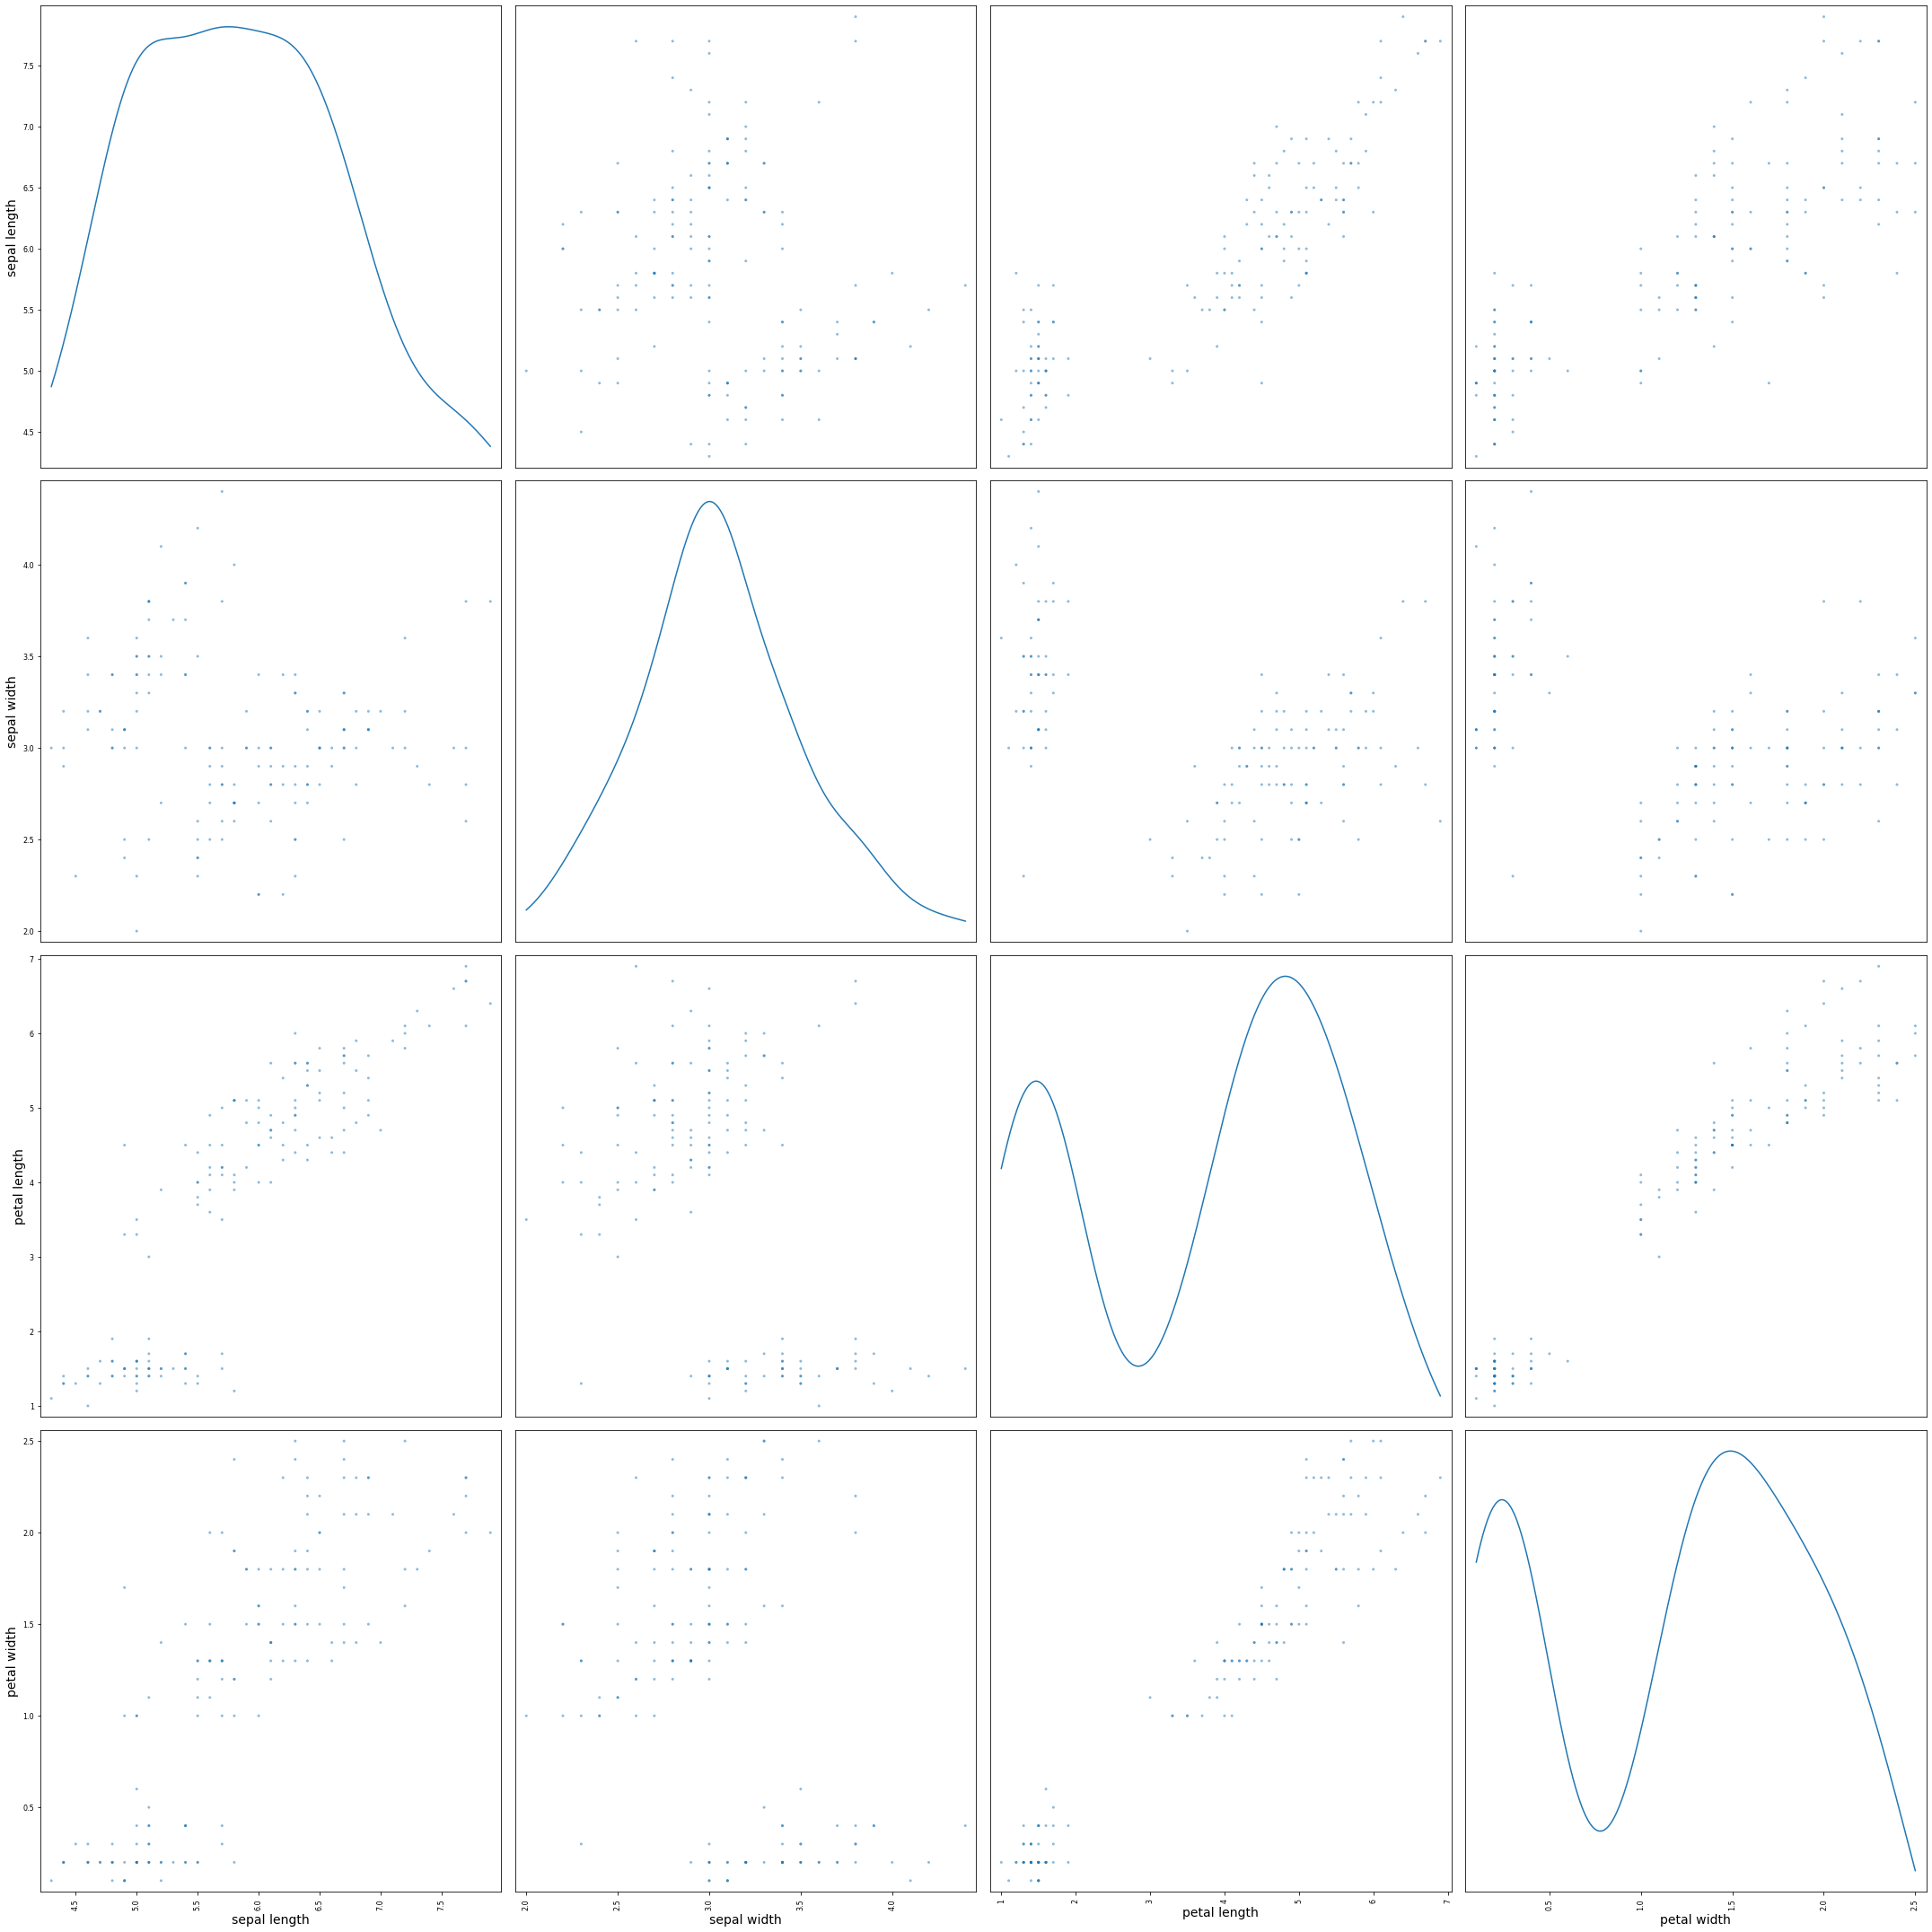

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df.toPandas(), figsize=(30, 30), diagonal='kde')
save_fig("scatter_matrix")
plt.show()

### Bubble Charts

Saving figure bubble_plots


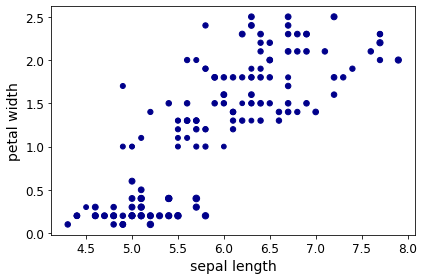

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
dfPandas= df.toPandas()
dfPandas.plot.scatter(x='sepal length', y='petal width', s=dfPandas['sepal width'] * 10, color='DarkBlue')
save_fig("bubble_plots")
plt.show()

### Parallel coordinates

Saving figure paralle_coordinates_plots


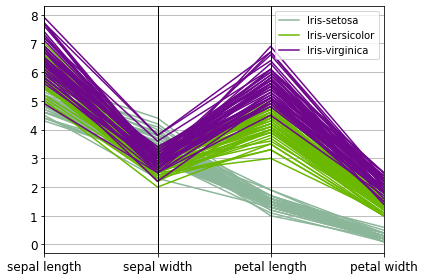

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.toPandas(), 'label')
save_fig("paralle_coordinates_plots")
plt.show()

In [14]:
spark.stop()